## Imports

In [25]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

%matplotlib inline
%config InlineBackend.figure_format='retina'

## Reading Data

In [2]:
car_train = pd.read_csv("../../../data/car_train.csv")

car_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_id         2337 non-null   object 
 1   model          2337 non-null   object 
 2   car_type       2337 non-null   object 
 3   fuel_type      2337 non-null   object 
 4   car_rating     2337 non-null   float64
 5   year_to_start  2337 non-null   int64  
 6   riders         2337 non-null   int64  
 7   year_to_work   2337 non-null   int64  
 8   target_reg     2337 non-null   float64
 9   target_class   2337 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 182.7+ KB


In [3]:
rides_info = pd.read_csv("../../../data/rides_info.csv").merge(
    car_train, on="car_id", how="inner"
)

rides_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406638 entries, 0 to 406637
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   user_id            406638 non-null  object 
 1   car_id             406638 non-null  object 
 2   ride_id            406638 non-null  object 
 3   ride_date          406638 non-null  object 
 4   rating             406638 non-null  float64
 5   ride_duration      406638 non-null  int64  
 6   ride_cost          406638 non-null  int64  
 7   speed_avg          406638 non-null  int64  
 8   speed_max          404817 non-null  float64
 9   stop_times         406638 non-null  int64  
 10  distance           406638 non-null  float64
 11  refueling          406638 non-null  int64  
 12  user_ride_quality  405134 non-null  float64
 13  deviation_normal   406638 non-null  float64
 14  model              406638 non-null  object 
 15  car_type           406638 non-null  object 
 16  fu

## Plotting

### Выбери код, соответствующий графике

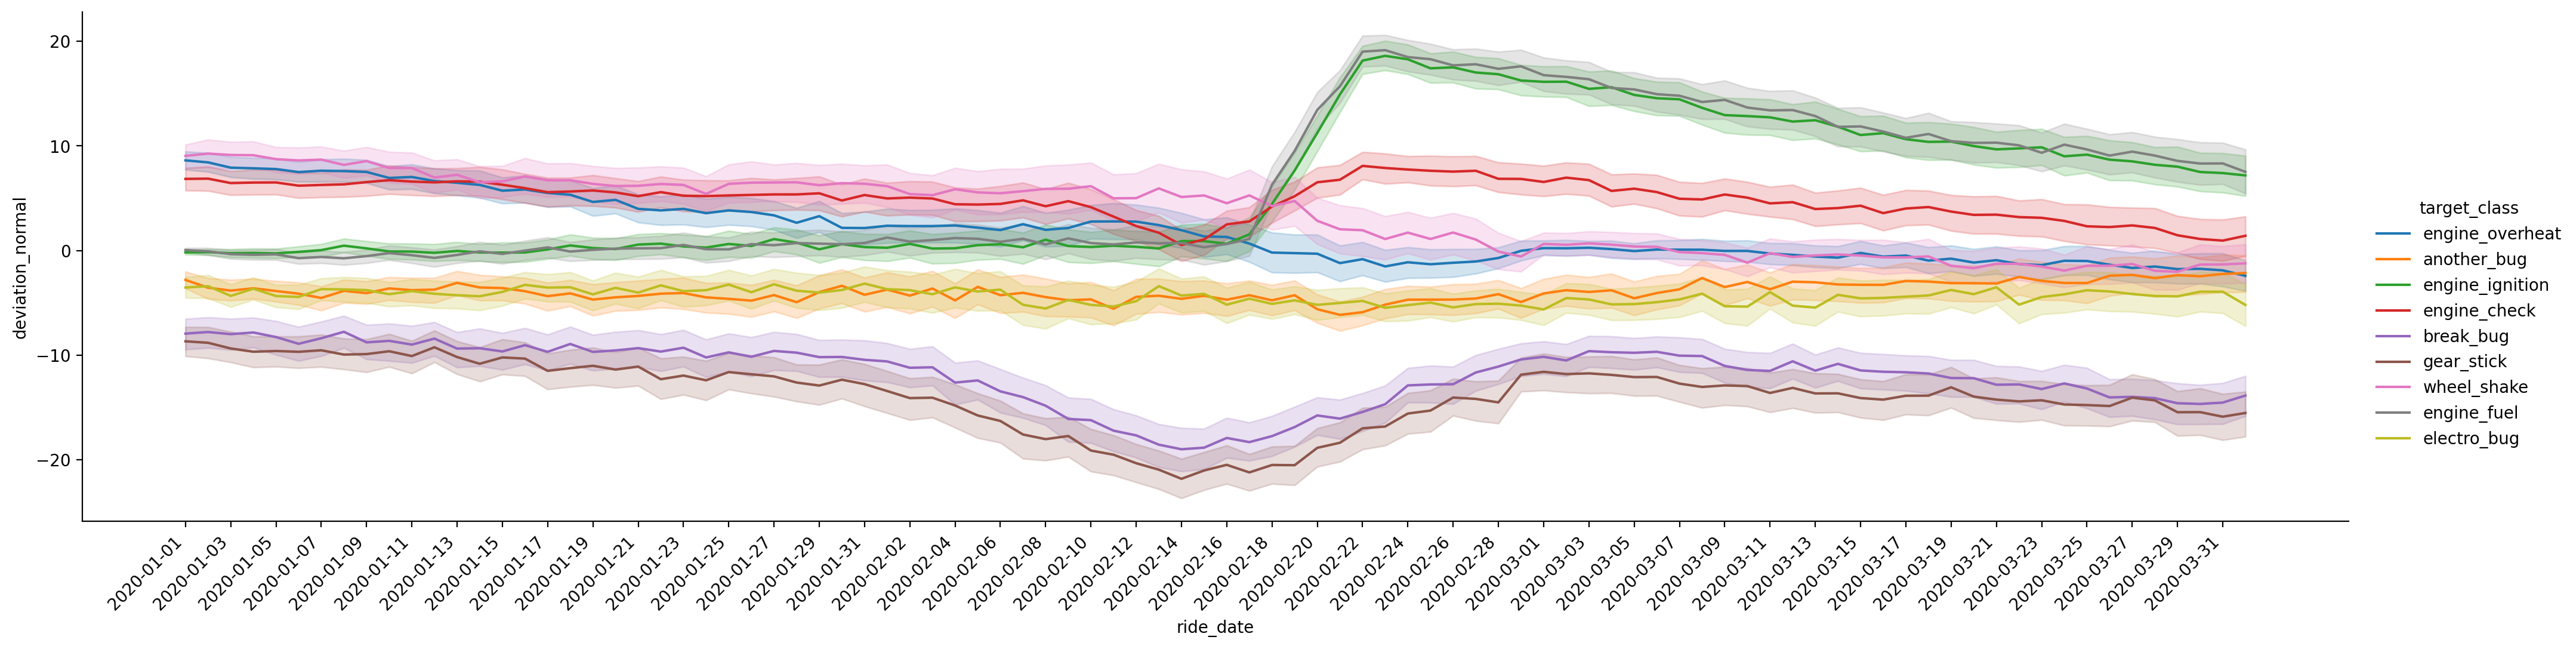

In [6]:
g = sns.relplot(
    data=rides_info,
    kind="line",
    x="ride_date",
    y="deviation_normal",
    hue="target_class",
    aspect=4,
)

g.set_xticklabels(rotation=45, horizontalalignment="right", step=2);

### Что там по crosstab и heatmap?

In [9]:
car_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_id         2337 non-null   object 
 1   model          2337 non-null   object 
 2   car_type       2337 non-null   object 
 3   fuel_type      2337 non-null   object 
 4   car_rating     2337 non-null   float64
 5   year_to_start  2337 non-null   int64  
 6   riders         2337 non-null   int64  
 7   year_to_work   2337 non-null   int64  
 8   target_reg     2337 non-null   float64
 9   target_class   2337 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 182.7+ KB


In [16]:
pd.crosstab(
    car_train["target_class"],
    car_train["model"],
    normalize=True,
).round(4).loc[:, "Nissan Qashqai"]

target_class
another_bug        0.0068
break_bug          0.0043
electro_bug        0.0073
engine_check       0.0060
engine_fuel        0.0081
engine_ignition    0.0128
engine_overheat    0.0098
gear_stick         0.0073
wheel_shake        0.0000
Name: Nissan Qashqai, dtype: float64

In [19]:
pd.crosstab(
    car_train["target_class"],
    car_train["model"],
).round(4).sum(axis=1)

target_class
another_bug        279
break_bug          270
electro_bug        249
engine_check       270
engine_fuel        262
engine_ignition    269
engine_overheat    289
gear_stick         284
wheel_shake        165
dtype: int64

In [21]:
pd.crosstab(
    car_train["target_class"],
    car_train["car_type"],
).round(4)

car_type         business  economy  premium  standart
target_class                                         
another_bug            13      179       11        76
break_bug              14      177        9        70
electro_bug            12      165       16        56
engine_check           21      175        8        66
engine_fuel            10      157       13        82
engine_ignition         9      173        8        79
engine_overheat        23      165       11        90
gear_stick             15      180        9        80
wheel_shake             0      165        0         0

In [22]:
pd.crosstab(
    car_train["target_class"],
    car_train["car_type"],
).round(4).sum()

car_type
business     117
economy     1536
premium       85
standart     599
dtype: int64

In [23]:
pd.crosstab(
    car_train["target_class"],
    car_train["model"],
    normalize=True,
).round(4).loc[:, "MINI CooperSE"]

target_class
another_bug        0.0026
break_bug          0.0017
electro_bug        0.0000
engine_check       0.0013
engine_fuel        0.0000
engine_ignition    0.0009
engine_overheat    0.0017
gear_stick         0.0009
wheel_shake        0.0000
Name: MINI CooperSE, dtype: float64

###  Задача на выбор верной графики

In [30]:
rides_info.columns

Index(['user_id', 'car_id', 'ride_id', 'ride_date', 'rating', 'ride_duration',
       'ride_cost', 'speed_avg', 'speed_max', 'stop_times', 'distance',
       'refueling', 'user_ride_quality', 'deviation_normal', 'model',
       'car_type', 'fuel_type', 'car_rating', 'year_to_start', 'riders',
       'year_to_work', 'target_reg', 'target_class'],
      dtype='object')

### Опиши параметры графика 

In [31]:
rides_info = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/rides_info.csv")
cars = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/car_train.csv")
driver_info = pd.read_csv("https://raw.githubusercontent.com/a-milenkin/Competitive_Data_Science/main/data/driver_info.csv")
 
rides_info = rides_info.merge(cars, on="car_id", how="right")
rides_info = rides_info.merge(driver_info, on="user_id", how="left")

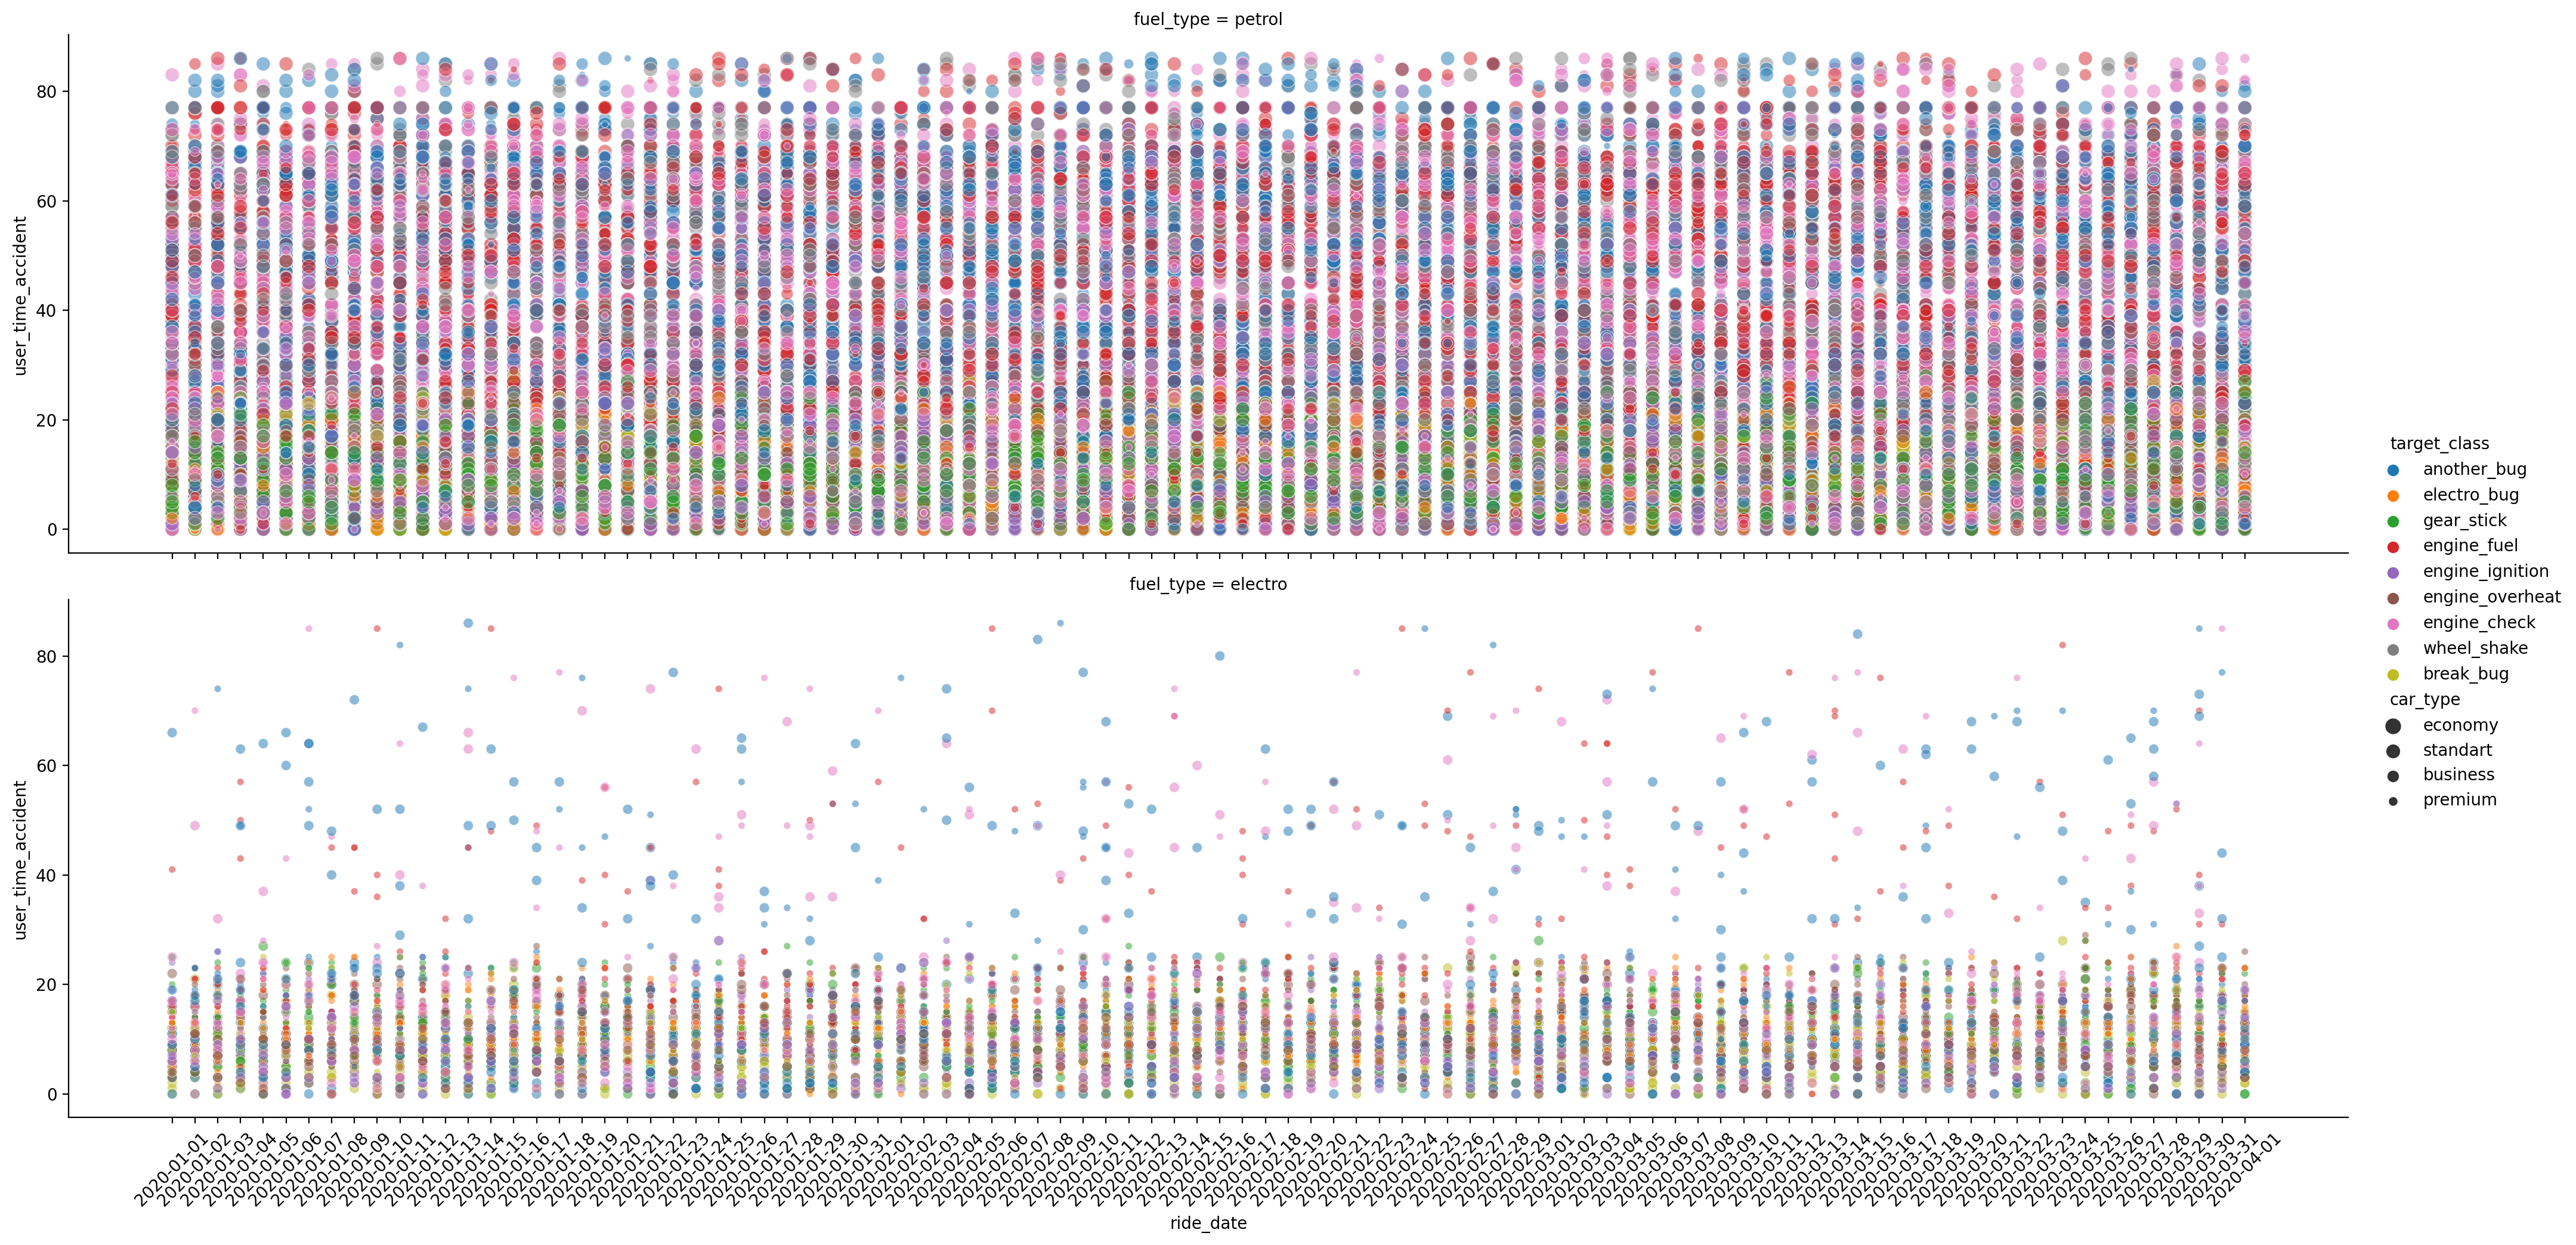

In [34]:
params = {
    "data": rides_info,
    "kind": "scatter",
    "x": "ride_date",
    "y": "user_time_accident",
    "row": "fuel_type",
    "size": "car_type",
    "hue": "target_class",
    "aspect": 4,
    "alpha": 0.5,
}

g = sns.relplot(**params)
plt.xticks(rotation=45);